# Data exploration

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time

# Allows the use of display() for displaying DataFrames
from IPython.display import display 

import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualization code visuals.py from project root folder
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [4]:
# TODO: Load the Red Wines dataset
data = pd.read_csv("data/winequality-red.csv", sep=';')

# TODO: Display the first five records
display(data.head(n=5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Verify if one colone have missing information
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [11]:
# More additional information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
# Some more additional data analysis
display(np.round(data.describe()))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


# Exploring Relationships between features

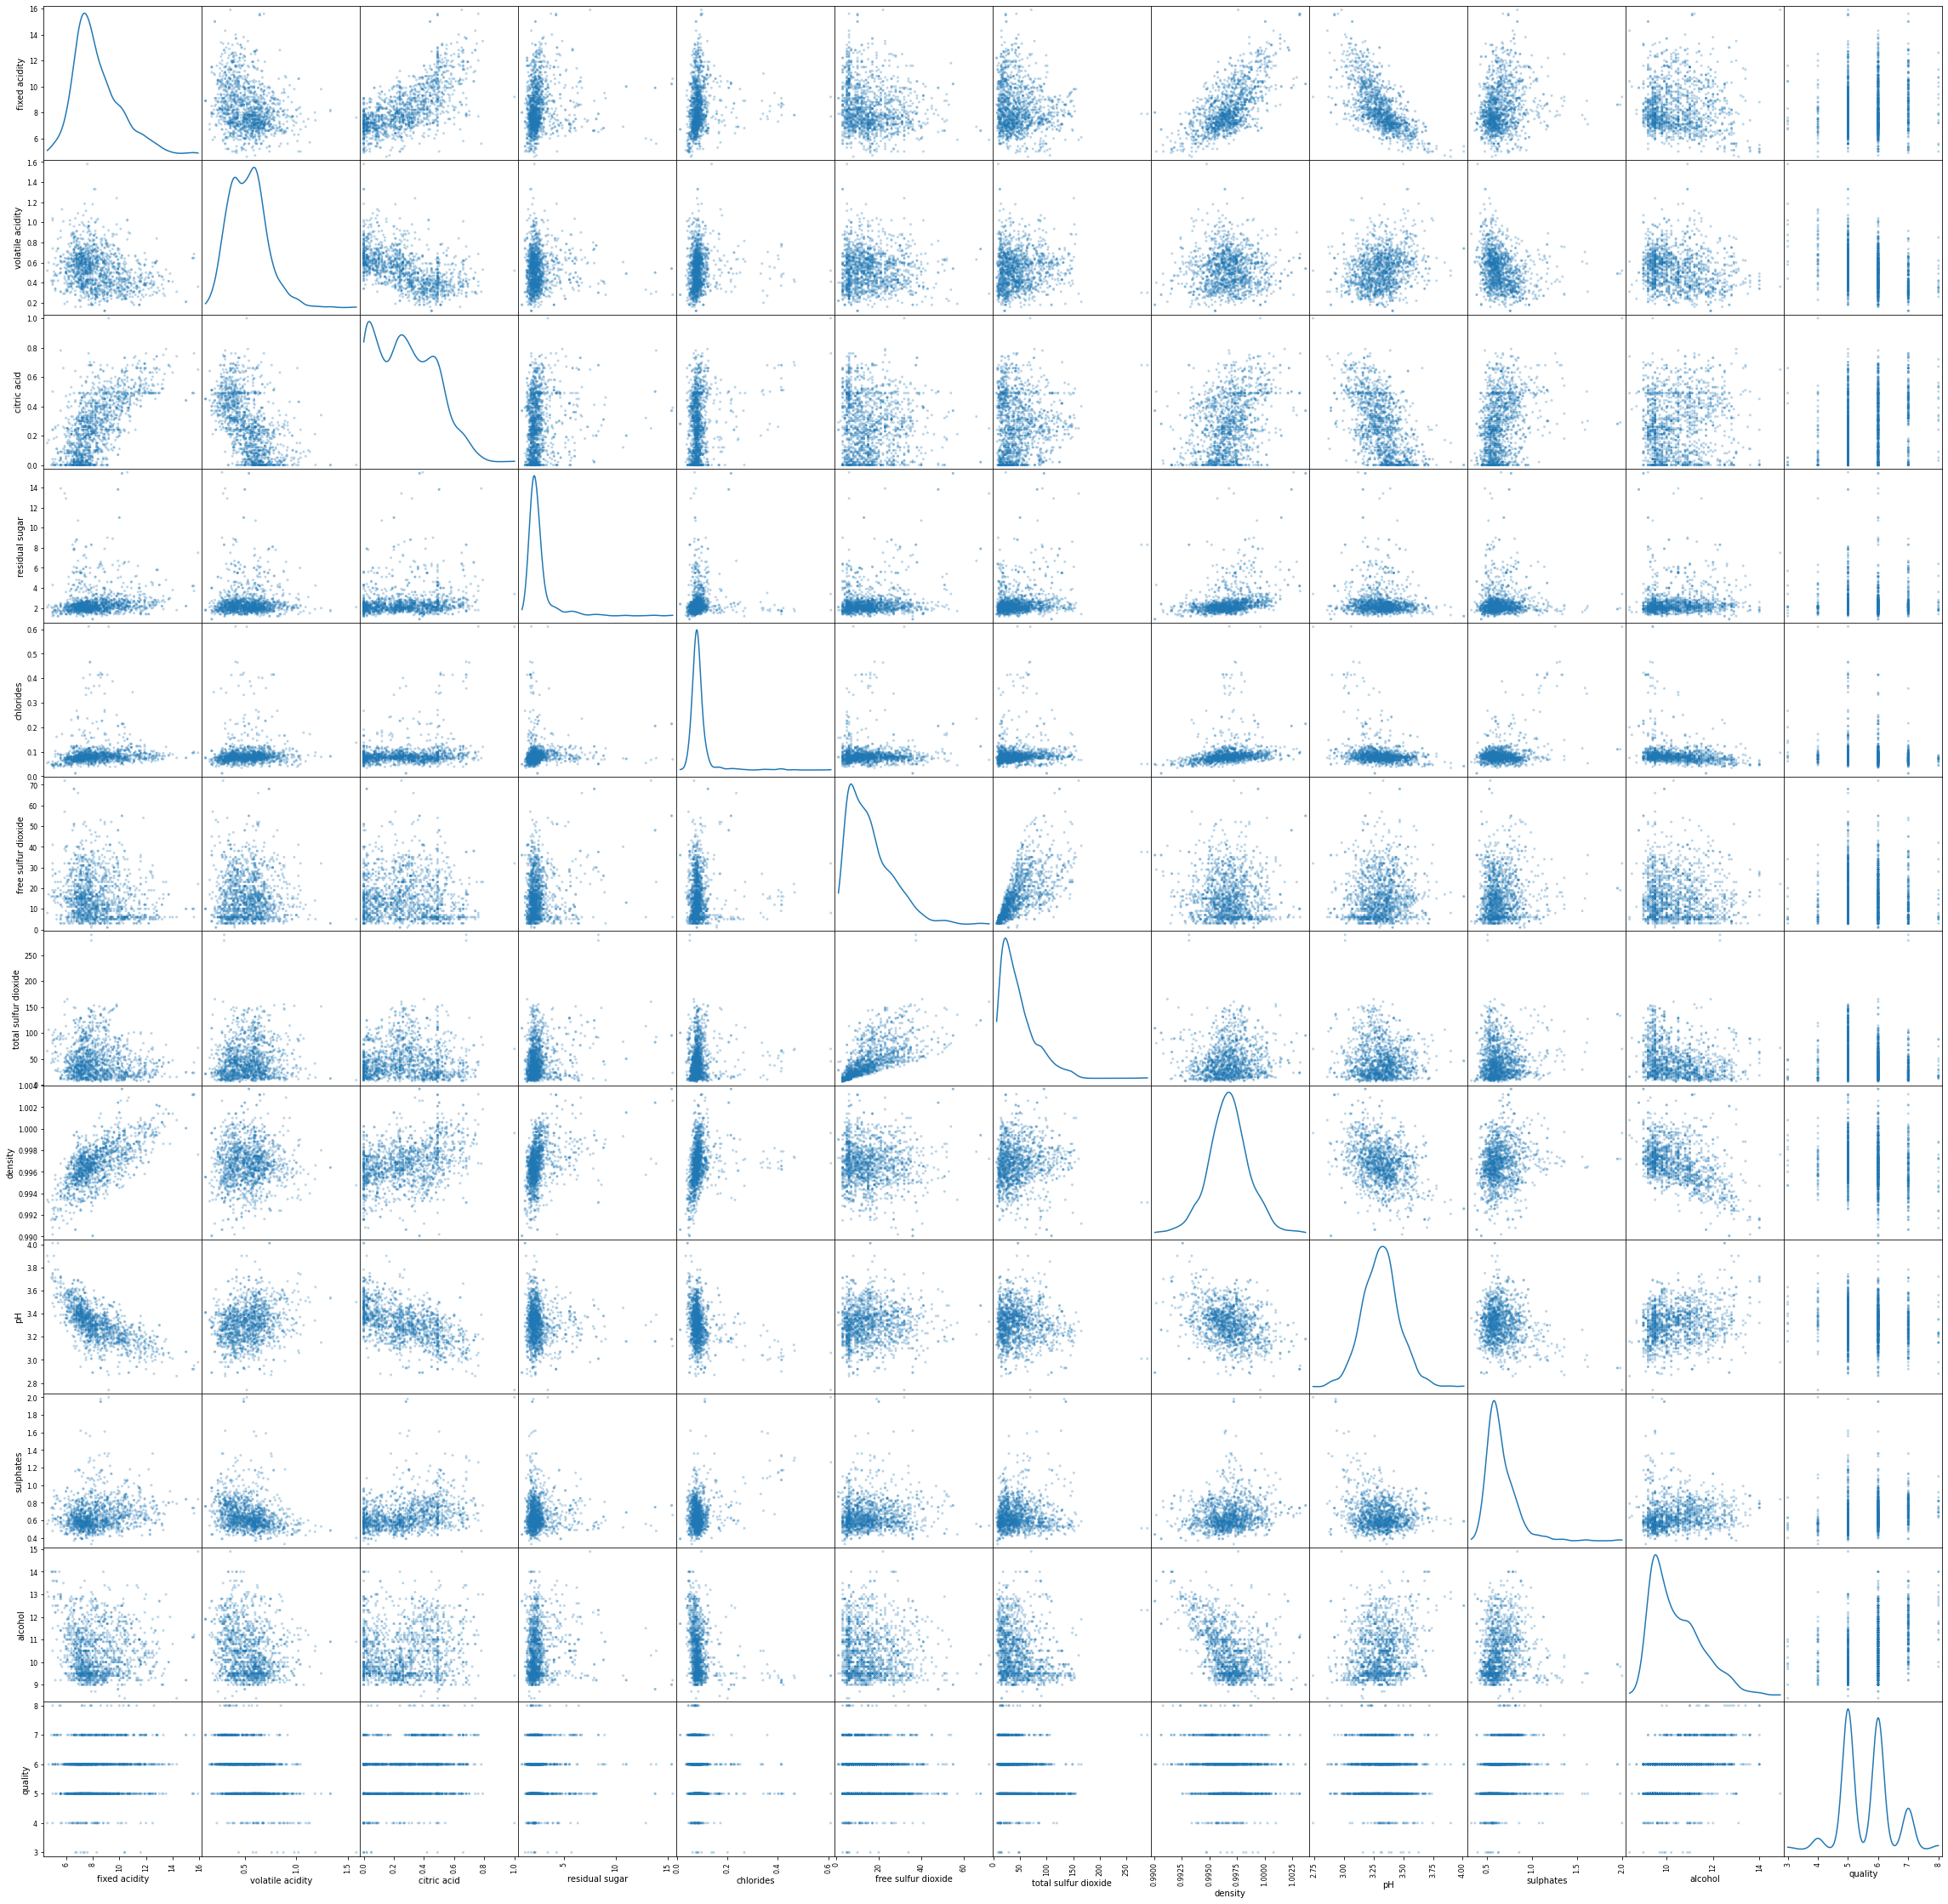

In [14]:
# Verify relationships between features
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

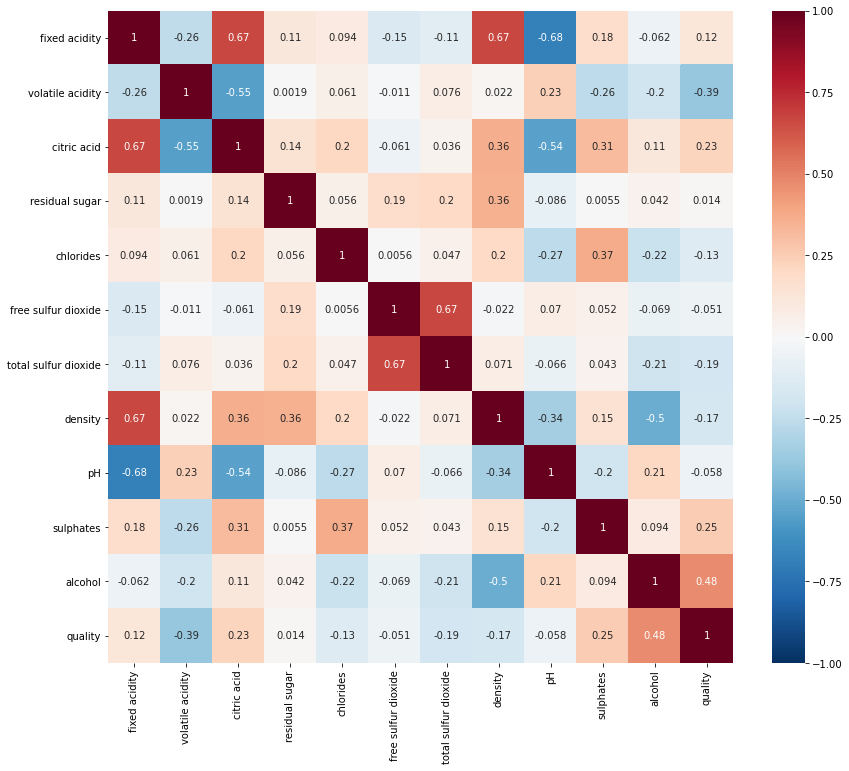

In [15]:
# Heatmap of co-relations between features
correlation = data.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

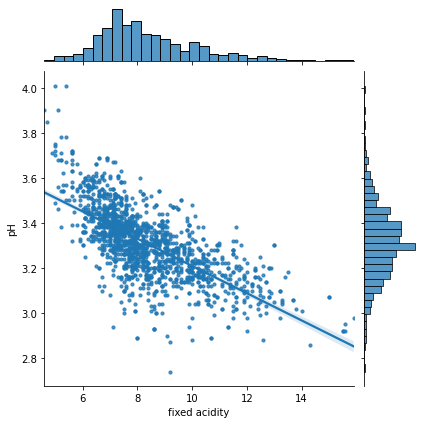

In [45]:
# Co-relation between pH and Fixed Acidity
fixedAcidity_pH = data[['pH', 'fixed acidity']]

# Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=6)

# Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

# Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.histplot)

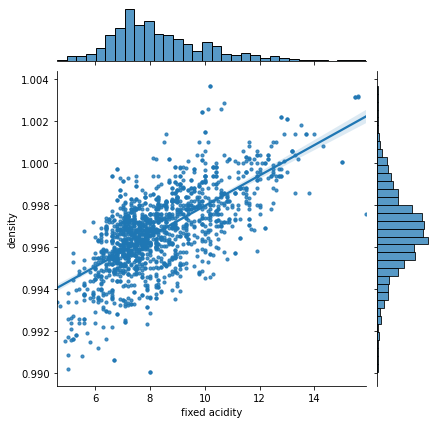

In [43]:
# Co-relation between Citric Acid levels and Fixed Acidity
fixedAcidity_density = data[['density', 'fixed acidity']]

gridB = sns.JointGrid(x="fixed acidity", y="density", data=fixedAcidity_density, height=6)
gridB = gridB.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridB = gridB.plot_marginals(sns.histplot)

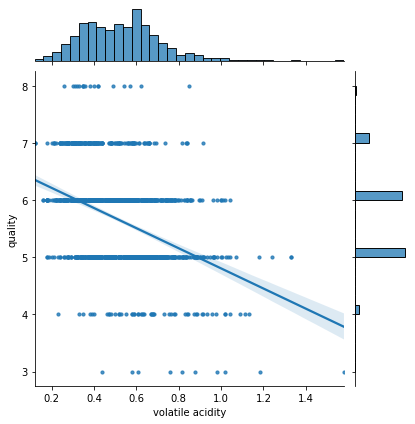

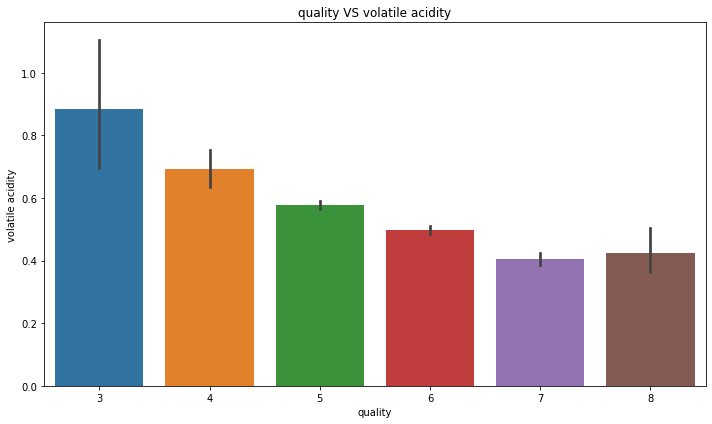

<Figure size 432x288 with 0 Axes>

In [48]:
# Co-relation between Quality and Volatile Acidity
volatileAcidity_quality = data[['quality', 'volatile acidity']]

gridC = sns.JointGrid(x="volatile acidity", y="quality", data=volatileAcidity_quality, height=6)
gridC = gridC.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridC = gridC.plot_marginals(sns.histplot)

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

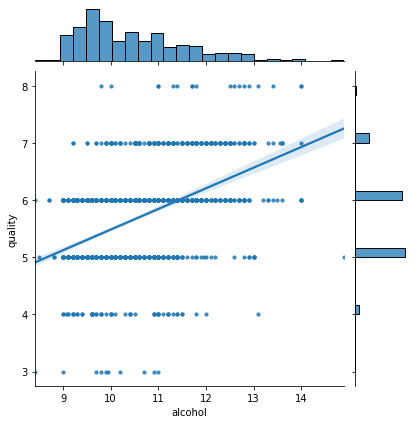

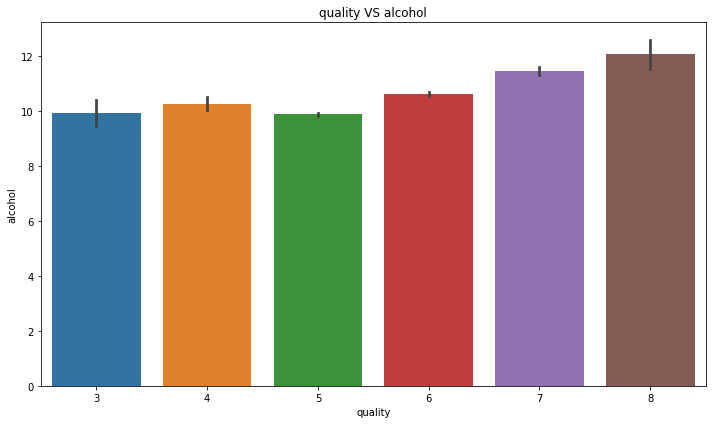

<Figure size 432x288 with 0 Axes>

In [49]:
# Co-relation between Quality and Alcohol
quality_alcohol = data[['alcohol', 'quality']]

gridD = sns.JointGrid(x="alcohol", y="quality", data=quality_alcohol, height=6)
gridD = gridD.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridD = gridD.plot_marginals(sns.histplot)

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=quality_alcohol, ax=axs)
plt.title('quality VS alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()

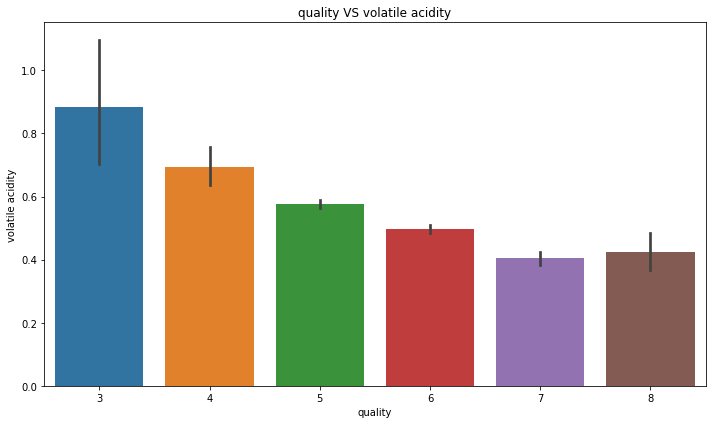

<Figure size 432x288 with 0 Axes>

In [47]:
# Co-relation between Quality and Volatile Acidity
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

# Prediction of the Quality of Wines

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

In [12]:
# Creation of predictive data and data to be predicted
features = data.drop('quality', axis = 1).values
target = data['quality'].values

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size = 0.3, random_state = 42, stratify = target)


## Random Forest and GridSearchCV

In [22]:
RDClassifier = RandomForestClassifier(max_depth=None, random_state=None)

parameters = {'n_estimators': [10, 20, 30, 40, 50], 'max_features':[3,4,5,6,7, None], 'max_depth': [5,6,7,8,9, None]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5, average="micro")

# Perform grid search on the claszsifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(RDClassifier, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_RDClassifier = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (RDClassifier.fit(X_train, y_train)).predict(X_test)
best_predictions = best_RDClassifier.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5, average="micro")))
print("\nOptimized Model\n------")
print(best_RDClassifier)
print("\nFinal accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,  average="micro")))

Unoptimized model
------
Accuracy score on testing data: 0.6583
F-score on testing data: 0.6583

Optimized Model
------
RandomForestClassifier(max_features=3, n_estimators=30)

Final accuracy score on the testing data: 0.6583
Final F-score on the testing data: 0.6583
